<a href="https://colab.research.google.com/github/bradencruzzz/programming-languages-data-analysis/blob/main/programming_languages_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programming Languages Data Deep Dive

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [11]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [12]:
df.head().sort_values(by='Posts', ascending=True)

,Date,TagName,Posts
0,7/1/2008 0:00,c#,3
1,8/1/2008 0:00,assembly,8
3,8/1/2008 0:00,c,85
4,8/1/2008 0:00,python,124
2,8/1/2008 0:00,javascript,162


In [13]:
df.tail().sort_values(by='Posts', ascending=True)

,Date,TagName,Posts
1989,7/1/2020 0:00,perl,182
1987,7/1/2020 0:00,go,743
1988,7/1/2020 0:00,ruby,775
1990,7/1/2020 0:00,swift,3607
1986,7/1/2020 0:00,r,5694


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [14]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [15]:
df['TagName'].count()

np.int64(1991)

In [16]:
df['Date'].count()

np.int64(1991)

In [17]:
df['Posts'].count()

np.int64(1991)

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [18]:
# Posts per language

df.groupby('TagName')['Posts'].sum().sort_values(ascending=False)

,Posts
TagName,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [19]:
# Months of Data

df.groupby('TagName')['Date'].count().sort_values(ascending=True)

,Date
TagName,
go,129
swift,135
r,142
assembly,144
java,144
delphi,144
c++,144
c,144
python,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [20]:
type(df['Date'][1])

str

In [21]:
df.Date[1]

'8/1/2008 0:00'

In [22]:
print(pd.to_datetime(df.Date[1]))

2008-08-01 00:00:00


In [23]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,TagName,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [24]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [25]:
pivoted_test_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_test_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [26]:
# Mini-Challenge (Pivot)

# The DataFrame was already pivoted in a previous step, and 'Date' is now the index.
# We can proceed with the analysis using the existing DataFrame.
# Renaming the DataFrame for clarity as it's in a "long" format with languages as columns.
long_df = df

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [27]:
print("Dimensions of the DataFrame:", long_df.shape)
print("\nColumn names:", long_df.columns)
print("\nFirst 5 rows:\n", long_df.head())

Dimensions of the DataFrame: (1991, 3)

Column names: Index(['Date', 'TagName', 'Posts'], dtype='object')

First 5 rows:
         Date     TagName  Posts
0 2008-07-01          c#      3
1 2008-08-01    assembly      8
2 2008-08-01  javascript    162
3 2008-08-01           c     85
4 2008-08-01      python    124


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [28]:
long_df.count()

,0
Date,1991
TagName,1991
Posts,1991


In [29]:
long_df.fillna(0, inplace=True)

In [30]:
long_df.head()

,Date,TagName,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [31]:
long_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [32]:
import matplotlib.pyplot as plt

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')


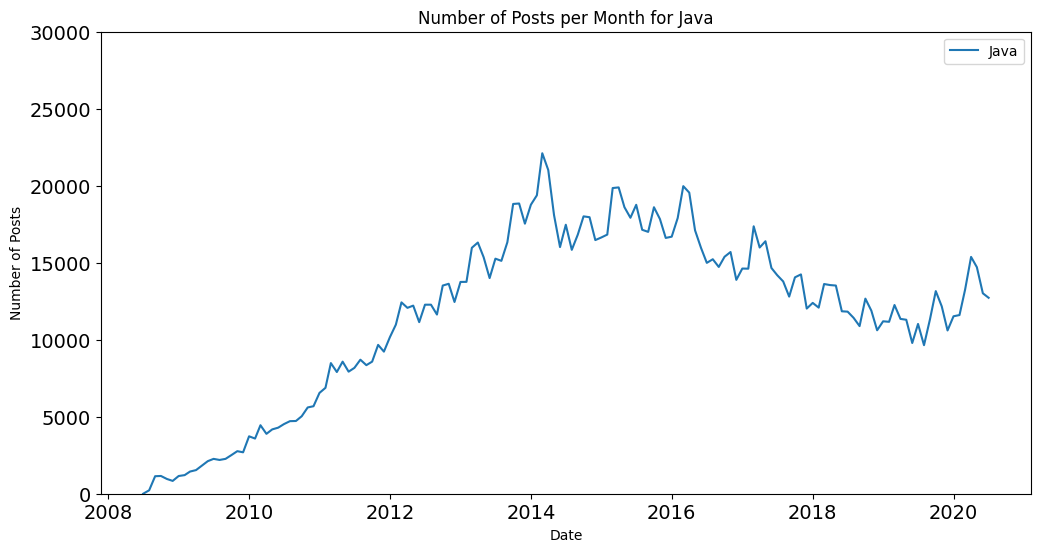

In [37]:
# Re-create the pivoted DataFrame from the original df
long_df = df.pivot(index='Date', columns='TagName', values='Posts')

# Fill any missing values with 0
long_df.fillna(0, inplace=True)

# Check the columns of the re-created DataFrame
print(long_df.columns)

# Now attempt to plot Java again
plt.figure(figsize=(12, 6))
plt.plot(long_df.index, long_df['java'], label='Java')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month for Java')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 30000)
plt.legend()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

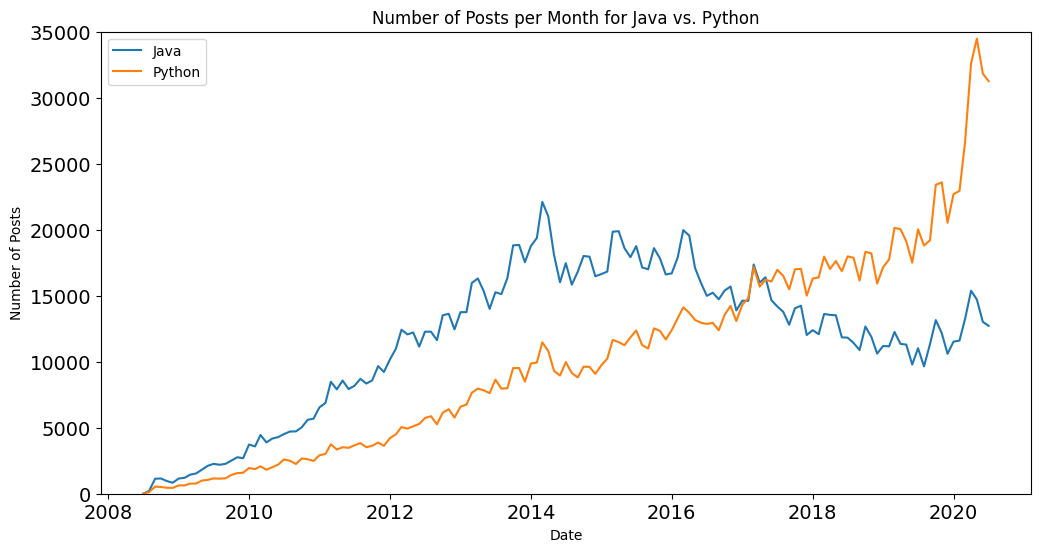

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(long_df.index, long_df['java'], label='Java')
plt.plot(long_df.index, long_df['python'], label='Python')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month for Java vs. Python')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.legend()
plt.show()

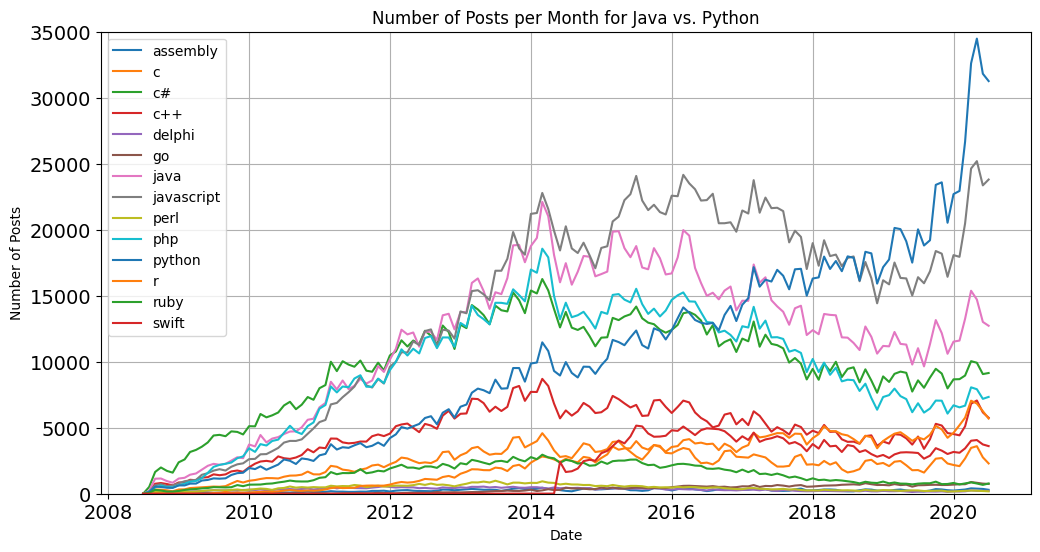

In [39]:
plt.figure(figsize=(12, 6))


for column in long_df.columns:
    plt.plot(long_df.index, long_df[column], label=long_df[column].name)

plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month for Java vs. Python')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)

plt.legend()
plt.grid(True)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

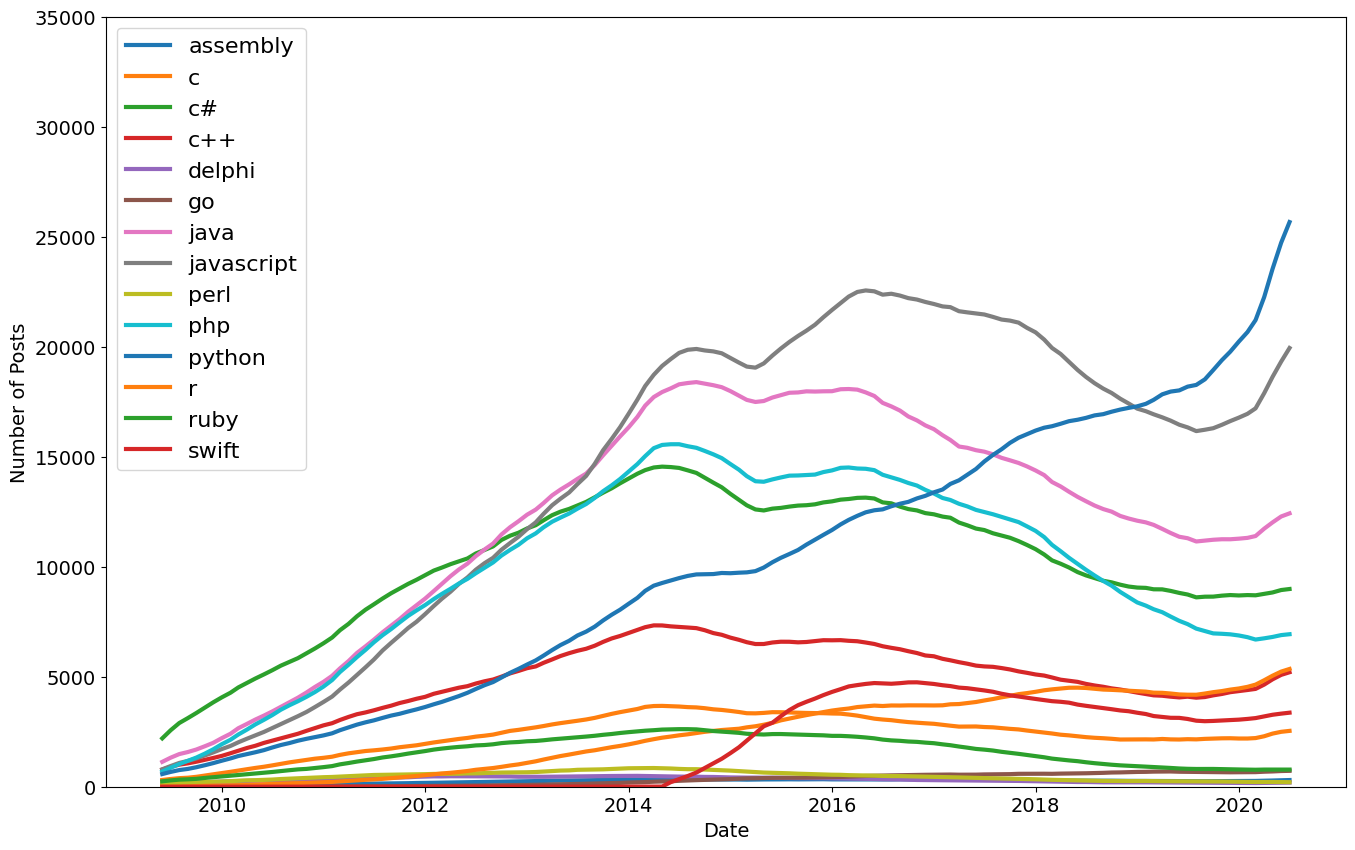

In [44]:
# The window is number of observations that are averaged
roll_df = long_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

Question 1:
Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

Answer: C#

Question 2:
What was the most popular programming language from 2015 to 2018?

Answer: Javascript

Question 3:
What was the most popular programming language in 2020?


Answer: Python